<a href="https://colab.research.google.com/github/KrishKanojia/Data-Science-Practice/blob/main/Electric_Vehicles_Market_Size_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective:
In this task we'll estimate the potential sales for a product or service within particular market segment.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Practice Dataset/Electric_Vehicle_Population_Data.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [4]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [5]:
df.dropna(inplace=True)

Electric Vechicle Adoption Over time: Analyze the growth of EV population by model year.



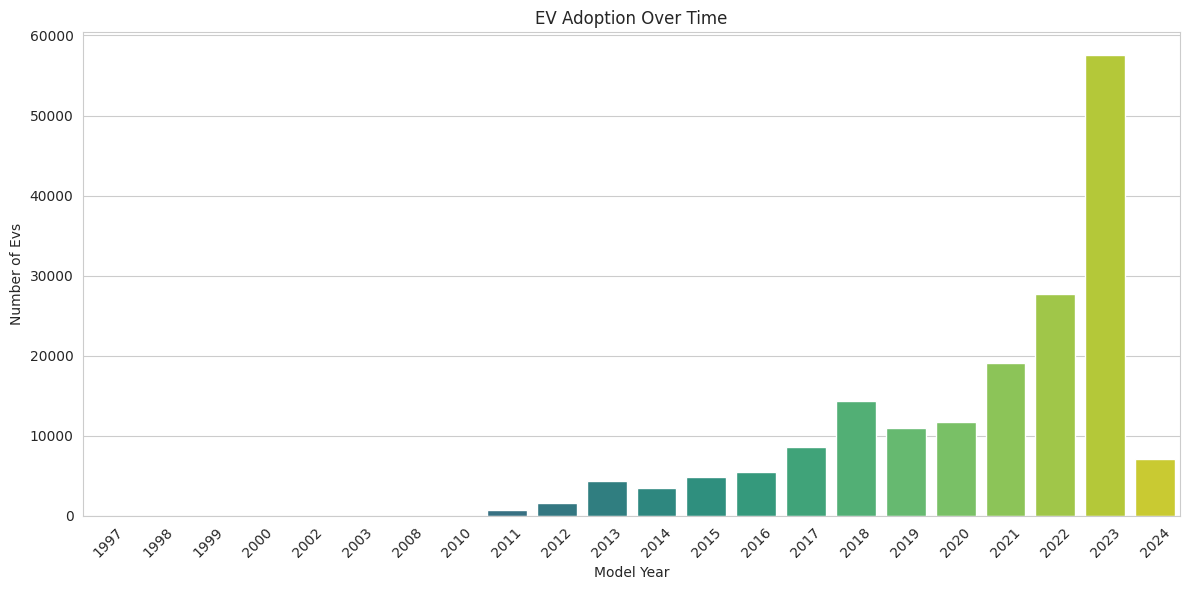

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# EV Adoption Over time
plt.figure(figsize=(12, 6))
ev_adoption_by_year = df['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette='viridis')
plt.title("EV Adoption Over Time")
plt.xlabel("Model Year")
plt.ylabel("Number of Evs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Growth of EV Distribution

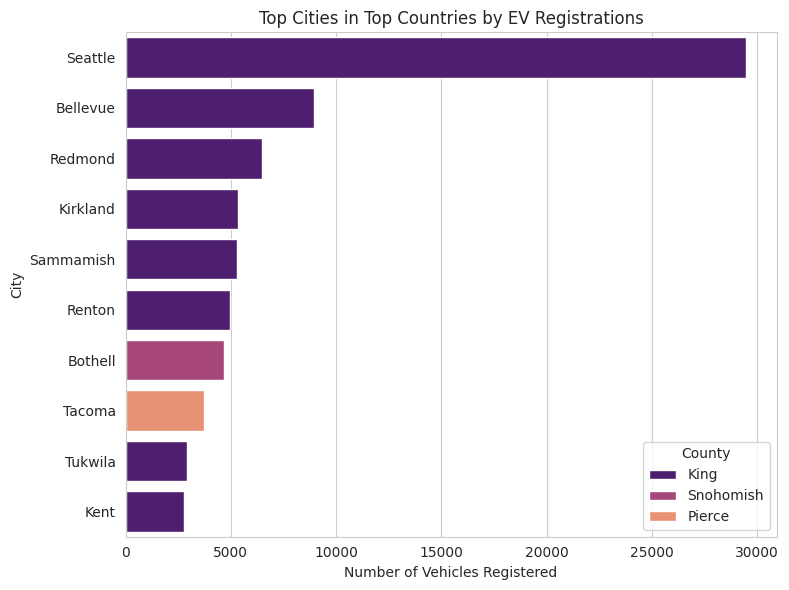

In [10]:
# Geographical distribution at county level
ev_country_distribution = df['County'].value_counts()
top_countries = ev_country_distribution.head(3).index

# Filtering the dataset for these top countries
top_countries_df = df[df['County'].isin(top_countries)]

# analyzing the distribution of EVs within the cities of these top countries
ev_city_distribution_top_countries = top_countries_df.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# Visualize the top 10 cities across these countries
top_cities = ev_city_distribution_top_countries.head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Countries by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

### Distribution of Types of Vehicle

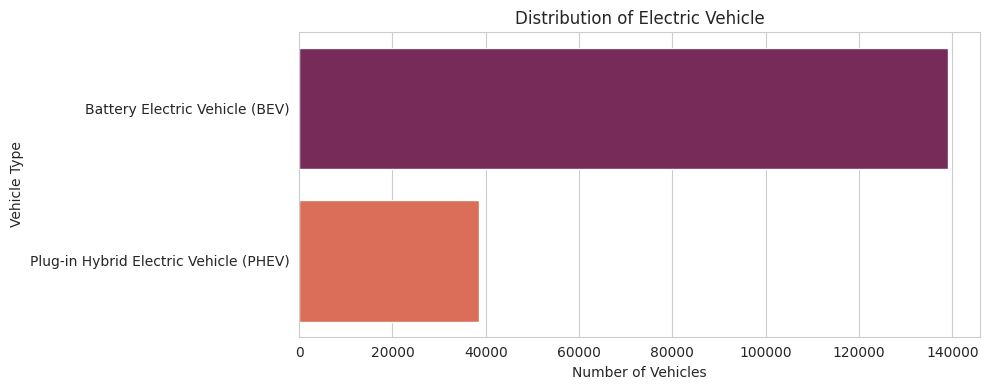

In [24]:
ev_type_distribution = df['Electric Vehicle Type'].value_counts()
plt.figure(figsize=(10, 4))
sns.barplot(x = ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket" )
plt.xlabel("Number of Vehicles")
plt.ylabel("Vehicle Type")
plt.title("Distribution of Electric Vehicle")
plt.tight_layout()
plt.show()